1.  Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews. Опишите в комментарии к уроку - какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

2. Поработайте с документацией TensorFlow 2. Найдите полезные команды не разобранные на уроке.

In [51]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import sequence

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [2]:
from keras.datasets import imdb

Using TensorFlow backend.


In [23]:
NUM_WORDS = 10000

In [34]:
(train_x, train_y), (test_x, test_y) = imdb.load_data()

In [35]:
train_x.shape

(25000,)

In [36]:
print(train_x[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [37]:
train_y.shape

(25000,)

In [38]:
train_y[0]

1

In [39]:
print("Количество классов: ")
print(np.unique(train_y))

Classes: 
[0 1]


In [40]:
print("Количество слов: ")
print(len(np.unique(np.hstack(train_x))))

Number of words: 
88585


Длина обзора: 
Средняя длина 238.71 слов со стандартным отклонением (176.49)
95 персентиль длины обзора:  610.0


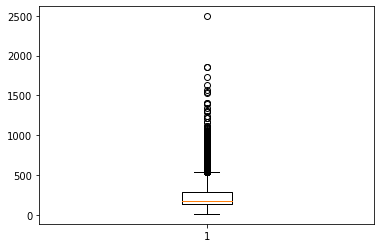

In [47]:
from matplotlib import pyplot
print("Длина обзора: ")
result = [len(x) for x in train_x]
print("Средняя длина %.2f слов со стандартным отклонением (%.2f)" % (np.mean(result), np.std(result)))
print("95 персентиль длины обзора: ", np.percentile(result, 95)) 

pyplot.boxplot(result)
pyplot.show()

In [8]:
test_x.shape

(25000,)

In [9]:
test_y.shape

(25000,)

In [10]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in train_x[0]] )
print(decoded) 

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [60]:
(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=NUM_WORDS)

In [61]:
MAX_WORDS = 610

In [62]:
train_x = sequence.pad_sequences(train_x, maxlen=MAX_WORDS)
test_x = sequence.pad_sequences(test_x, maxlen=MAX_WORDS)

In [63]:
# train_y = np.array(train_y).astype("float32")
# test_y = np.array(test_y).astype("float32")

In [103]:
model = keras.Sequential([
    keras.layers.Embedding(NUM_WORDS, 32, input_length=MAX_WORDS),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.Dropout(0.5),  
    keras.layers.Dense(256, activation='sigmoid'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='sigmoid'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

In [104]:
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 610, 32)           320000    
_________________________________________________________________
flatten_8 (Flatten)          (None, 19520)             0         
_________________________________________________________________
dense_46 (Dense)             (None, 512)               9994752   
_________________________________________________________________
dropout_35 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_36 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 256)             

In [105]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics=['accuracy'])

In [106]:
model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=3, batch_size=32)

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 13s 531us/sample - loss: 0.5306 - accuracy: 0.6901 - val_loss: 0.3064 - val_accuracy: 0.8732
Epoch 2/3
25000/25000 [==============================] - 13s 504us/sample - loss: 0.2361 - accuracy: 0.9116 - val_loss: 0.3532 - val_accuracy: 0.8533
Epoch 3/3
25000/25000 [==============================] - 12s 495us/sample - loss: 0.1245 - accuracy: 0.9598 - val_loss: 0.4030 - val_accuracy: 0.8748


In [107]:
test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=1)

print('\nTest accuracy:', test_acc)

25000/25000 [==============================] - 3s 124us/sample - loss: 0.4030 - accuracy: 0.8748

Test accuracy: 0.87476


В улучшении показателей модели помогли следующие факторы: увеличение количества слоев, увеличение показателя дропаута (чтобы сократить переобучение), замена функции активации на сигмоид, сокращение количества эпох (опять таки сокращение переобучения).